# Description du dataset AVT

Le dataset [Aortic Vessel T (AVT)](https://www.notion.so/supermuel/Aortic-Vessel-Tree-25dae411209f4613a2feb7863cff66d3?pvs=4) contient de base des fichiers en **.nnrd** 

```
├── Dongyang
│   ├── D1
│   │   ├── D1.nrrd
│   │   └── D1.seg.nrrd
.........................
│   ├── D18
│   │   ├── D18.nrrd
│   │   └── D18.seg.nrrd
├── KiTS
│   ├── K1
│   │   ├── K1.nrrd
│   │   └── K1.seg.nrrd
.........................
│   └── K20
│       ├── K20.nrrd
│       └── K20.seg.nrrd
└── Rider
    ├── R1_(AD)
    │   ├── R1.nrrd
    │   └── R1.seg.nrrd
..........................
    ├── R18
    │   ├── R18.nrrd
    │   └── R18.seg.nrrd
```

Il est composé de trois sous-datasets différents

- **Dongyang**

- **KiTS**

- **Rider** : Celui-ci contient des aortes avec anévrisme et dissections aortiques ! De plus les images contiennent un "bord noir", à faire attention pour la normalisation.

[Lien DRIVE ](https://drive.google.com/drive/folders/1bGOdseGWJLlh_ij_wprr_B4aC6ofxzOw?usp=share_link)

# Accès aux fichiers du drive de Samuel



## Explications
Vous avez accès avec Colab à une petite machine Linux, et donc une arborescence classique de fichiers. 

Les données que l'on génère et dont on a besoin seront généralement stockées dans `/content`.

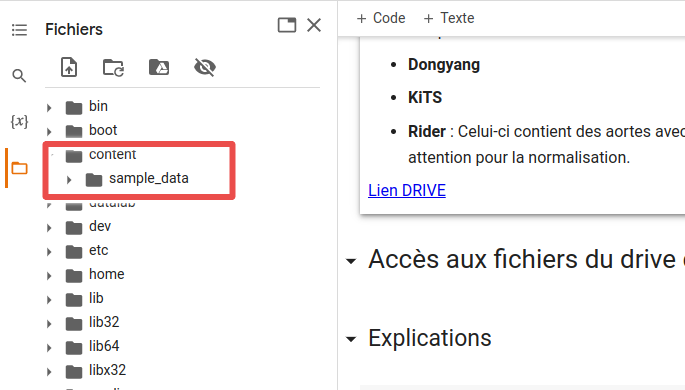

Dans ce dossier, on peut "monter" notre Google Drive personnel, et ainsi accéder à tous nos fichiers :

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


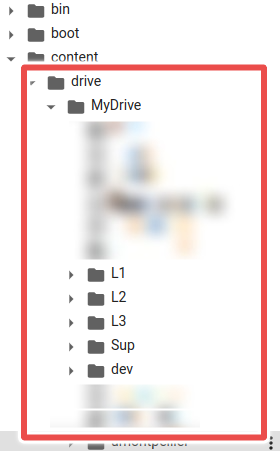

In [ ]:
# Vous avec accès à vos fichiers personnels : 

!ls drive/

MyDrive  Othercomputers


## Comment accéder au dataset AVT, stocké sur le drive de Samuel ? 

Vous devez créer un raccourci du dossier [**PP2_drive_sam**](https://drive.google.com/drive/folders/14P8u1HGohRuw3l6KLmvmYadaqiedoqXa?usp=share_link) quelque part dans votre Google Drive à vous.

Enfin, renseignez le chemin d'accès vers ce dossier dans le code ci-dessous.

In [ ]:
from pathlib import Path

# SAMUEL
PP2_drive_sam_folder = Path("/content", "drive", "MyDrive", "L3", "S6", "PP2_drive_sam") 

# ILONA
# PP2_drive_ilo_folder = Path("/content", "drive", "MyDrive",  "PP2_drive_sam") 
# AVT_DRIVE_FOLDER = PP2_drive_ilo_folder / "datasets" / "AVT"

# ROSA
# PP2_drive_sam_folder = Path("/content", "drive","MyDrive",  "PP2_drive_sam") 

# IBRAHIM
# PP2_drive_sam_folder = Path("/content", "drive", ........,  "PP2_drive_sam") 

AVT_DRIVE_FOLDER = PP2_drive_sam_folder / "datasets" / "AVT"

!ls {AVT_DRIVE_FOLDER}

Dongyang  KiTS	Rider


# Ouverture des fichiers **.nrrd**


In [ ]:
!pip install pynrrd
import nrrd
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[]

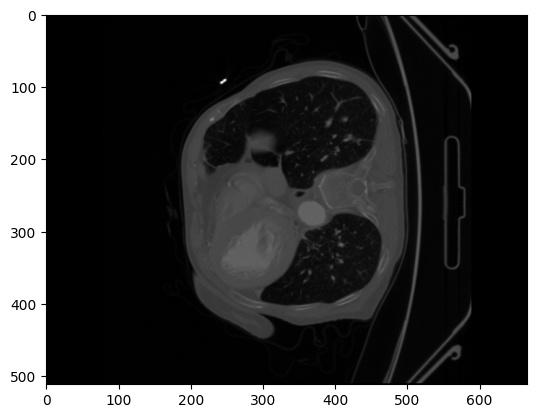

In [ ]:
exemple_nrrd = AVT_DRIVE_FOLDER / "Dongyang" / "D1" / "D1.nrrd"

# Chargement du volume : 

vol, header = nrrd.read(exemple_nrrd)

# Affichage d'une slice : 

k = 150
slce = vol[:,:,k]

plt.imshow(slce, cmap="gray")
del vol
plt.plot()

In [ ]:
#@title Définition des chemins vers les volumes

Dongyang_images_files = [ Path(f'Dongyang/D{i}/D{i}.nrrd') for i in range(1,19)]
Dongyang_images_paths = [ AVT_DRIVE_FOLDER / x for x in Dongyang_images_files]

Dongyang_masks_files = [ Path(f'Dongyang/D{i}/D{i}.seg.nrrd') for i in range(1,19)]
Dongyang_masks_paths = [ AVT_DRIVE_FOLDER / x for x in Dongyang_masks_files]


KiTS_images_files = [ Path(f'KiTS/K{i}/K{i}.nrrd') for i in range(1,21)]
KiTS_images_paths = [ AVT_DRIVE_FOLDER / x for x in KiTS_images_files]

KiTS_masks_files = [ Path(f'KiTS/K{i}/K{i}.seg.nrrd') for i in range(1,21)]
KiTS_masks_paths = [ AVT_DRIVE_FOLDER / x for x in KiTS_masks_files]



Rider_images_files = [ Path(f'Rider/R{i}/R{i}.nrrd') for i in [3,4,9,10,11,12,13,14,15,16,17,18]]
Rider_images_paths = [ AVT_DRIVE_FOLDER / x for x in Rider_images_files]

Rider_masks_files = [ Path(f'Rider/R{i}/R{i}.seg.nrrd') for i in [3,4,9,10,11,12,13,14,15,16,17,18]]
Rider_masks_paths = [ AVT_DRIVE_FOLDER / x for x in Rider_masks_files]


images_paths = Dongyang_images_paths + KiTS_images_paths + Rider_images_paths
masks_paths = Dongyang_masks_paths + KiTS_masks_paths + Rider_masks_paths

assert all(x.exists() for x in images_paths + masks_paths)

Pour le modèle de base de Colab avec 12GO de RAM, en éxécutant :
```python
data = []
for p in images_paths + masks_paths:
  print(p)
  vol, _ = nrrd.read(p)
  data.append(vol)
```

on remarque que l'on peut **stocker en mémoire** (avant que la session ne crash) tous les volumes mais **qu'une partie de leurs masques** :
```
D1.nrrd,D2.nrrd,D3.nrrd,D4.nrrd,D5.nrrd,D6.nrrd,D7.nrrd,D8.nrrd,D9.nrrd,D10.nrrd,D11.nrrd,D12.nrrd,D13.nrrd,D14.nrrd,D15.nrrd,D16.nrrd,D17.nrrd,D18.nrrd,K1.nrrd,K2.nrrd,K3.nrrd,K4.nrrd,K5.nrrd,K6.nrrd,K7.nrrd,K8.nrrd,K9.nrrd,K10.nrrd,K11.nrrd,K12.nrrd,K13.nrrd,K14.nrrd,K15.nrrd,K16.nrrd,K17.nrrd,K18.nrrd,K19.nrrd,K20.nrrd,R3.nrrd,R4.nrrd,R9.nrrd,R10.nrrd,R11.nrrd,R12.nrrd,R13.nrrd,R14.nrrd,R15.nrrd,R16.nrrd,R17.nrrd,R18.nrrd,
et 
D1.seg.nrrd,D2.seg.nrrd,D3.seg.nrrd,D4.seg.nrrd,D5.seg.nrrd,D6.seg.nrrd,D7.seg.nrrd,D8.seg.nrrd,D9.seg.nrrd,D10.seg.nrrd,D11.seg.nrrd,D12.seg.nrrd,D13.seg.nrrd,D14.seg.nrrd,D15.seg.nrrd,D16.seg.nrrd,D17.seg.nrrd,D18.seg.nrrd,
K1.seg.nrrd,K2.seg.nrrd,K3.seg.nrrd,K4.seg.nrrd,K5.seg.nrrd,K6.seg.nrrd,K7.seg.nrrd,K8.seg.nrrd,K9.seg.nrrd,K10.seg.nrrd,K11.seg.nrrd,K12.seg.nrrd,K13.seg.nrrd,K14.seg.nrrd,K15.seg.nrrd,K16.seg.nrrd,K17.seg.nrrd,K18.seg.nrrd,K19.seg.nrrd,K20.seg.nrrd,R3.seg.nrrd
```

# Analyse, normalisation
Avec le code suivant :
```python
extremas = {}
for p in Dongyang_images_paths + KiTS_images_paths + Rider_images_paths:
  ct_name = p.parts[-1]
  print(f"CT-Scan {ct_name}")
  vol,_ = nrrd.read(p)
  unique_sorted = np.unique(vol)
  min = unique_sorted[0]
  max = unique_sorted[-1]

  extremas[ct_name] = {"min":min, "max":max}
  print(f"    10 plus petites valeurs : {unique_sorted[:10]}")
  print(f"    10 plus grandes valeurs : {unique_sorted[-10:]}")
```

On peut analyser manuellement les plus petites et les plus grandes valeurs de chaque dataset. 

On remarquera que pour le dataset **Rider**, la plus petite valeur est toujours -2000 alors que la deuxième plus petite valeur est 0. Cela veut dire que -2000 est une valeur artificielle, qui ne correspond pas à l'image. 
En fait, les volumes du dataset **Rider** sont des volumes 3D en "forme de cube", mais les réelles donnéees du CT-Scan sont un Cylindre. Et la valeur -2000 est la valeur pour tous les points en dehors de ce cylindre.

In [ ]:
CT_extremas = {
 'D1':  {'min': -1024, 'max': 3071},
 'D2':  {'min': -1024, 'max': 3071},
 'D3':  {'min': -1024, 'max': 6484},
 'D4':  {'min': -1024, 'max': 3071},
 'D5':  {'min': -1024, 'max': 3071},
 'D6':  {'min': -1024, 'max': 3071},
 'D7':  {'min': -1024, 'max': 3071},
 'D8':  {'min': -1024, 'max': 3071},
 'D9':  {'min': -1024, 'max': 2993},
 'D10': {'min': -1024, 'max': 3071},
 'D11': {'min': -1024, 'max': 3071},
 'D12': {'min': -1024, 'max': 3071},
 'D13': {'min': -1024, 'max': 2576},
 'D14': {'min': -1024, 'max': 3071},
 'D15': {'min': -1024, 'max': 3071},
 'D16': {'min': -1024, 'max': 3071},
 'D17': {'min': -1024, 'max': 14542},
 'D18': {'min': -1024, 'max': 3071},

 'K1':  {'min': 0,     'max': 4095},
 'K2':  {'min': 0,     'max': 4095},
 'K3':  {'min': 0,     'max': 4095},
 'K4':  {'min': 0,     'max': 4095},
 'K5':  {'min': 0,     'max': 4095},
 'K6':  {'min': 0,     'max': 4095},
 'K7':  {'min': 0,     'max': 4054},
 'K8':  {'min': 0,     'max': 4095},
 'K9':  {'min': 0,     'max': 3522},
 'K10': {'min': 0,     'max': 3993},
 'K11': {'min': 0,     'max': 2704},
 'K12': {'min': 0,     'max': 3531},
 'K13': {'min': 0,     'max': 4095},
 'K14': {'min': 0,     'max': 4045},
 'K15': {'min': 0,     'max': 3259},
 'K16': {'min': 0,     'max': 4055},
 'K17': {'min': 0,     'max': 2505},
 'K18': {'min': -2048, 'max': 5064},
 'K19': {'min': 0,     'max': 2636},
 'K20': {'min': 0,     'max': 4094},

 'R3':  {'min': 0, 'max': 4095},
 'R4':  {'min': 0, 'max': 2679},
 'R9':  {'min': 0, 'max': 4095},
 'R10': {'min': 0, 'max': 4095},
 'R11': {'min': 0, 'max': 4095},
 'R12': {'min': 0, 'max': 4095},
 'R13': {'min': 0, 'max': 4095},
 'R14': {'min': 0, 'max': 4095},
 'R15': {'min': 0, 'max': 4095},
 'R16': {'min': 0, 'max': 4095},
 'R17': {'min': 0, 'max': 4095},
 'R18': {'min': 0, 'max': 2880}
 }


Avec ces informations, il est alors facile de normaliser chaque volume. 

In [ ]:
def ct_name_from_path(volume_path:Path)->str:
  return volume_path.parts[-1].split('.')[0]

def load_and_normalize_volume(volume_path:Path)->Tuple[np.ndarray, Dict]:
    """
    Open the volume file located at the given path, normalize its values, and return a NumPy array and the header.

    This function inspects the path to determine which CT-Scan it refers to and uses the CT_extremas
    dictionary to perform an optimal normalization.

    The file targeted by volume_path must be in the format XX.nrrd, where XX corresponds to a key in
    CT_extremas.

    Args:
        volume_path (Path): The path of the volume file to load and normalize.

    Returns:
        Tuple[np.ndarray, Dict]: A tuple containing the normalized volume data as a NumPy array and the header as a dictionary.

    Example:
        normalized_volume, header = load_and_normalize_volume(Path('CT-01.nrrd'))
    """

    ct_name = ct_name_from_path(volume_path)
    extremas = CT_extremas[ct_name]
    min, max = extremas['min'], extremas['max']

    vol, header = nrrd.read(volume_path)

    vol[vol < min] = min
    vol[vol > max] = max
    vol -= min
    return vol / (max-min), header


NameError: ignored

On peut vérifier que tous les CT-Scans sont correctement normalisés :

```python
for p in images_paths:
  print(p.parts[-1])
  vol, _ = load_and_normalize_volume(p)
  min ,max = np.min(vol), np.max(vol)
  assert min == 0 and max == 1
```

# Création d'un dataset d'entrainement

In [ ]:
#@title Définition des données d'entrainement et de test

TRAINING_PORTION = 0.8

training_images_paths = Dongyang_images_paths[:int(len(Dongyang_images_paths) * TRAINING_PORTION)] + \
                        KiTS_images_paths    [:int(len(KiTS_images_paths)     * TRAINING_PORTION)] + \
                        Rider_images_paths   [:int(len(Rider_images_paths)    * TRAINING_PORTION)]

training_masks_paths = Dongyang_masks_paths  [:int(len(Dongyang_masks_paths)  * TRAINING_PORTION)] + \
                       KiTS_masks_paths      [:int(len(KiTS_masks_paths)      * TRAINING_PORTION)] + \
                       Rider_masks_paths     [:int(len(Rider_masks_paths)     * TRAINING_PORTION)]


testing_images_paths = Dongyang_images_paths[int(len(Dongyang_images_paths) * TRAINING_PORTION):] + \
                       KiTS_images_paths    [int(len(KiTS_images_paths)     * TRAINING_PORTION):] + \
                       Rider_images_paths   [int(len(Rider_images_paths)    * TRAINING_PORTION):]

testing_masks_paths = Dongyang_masks_paths  [int(len(Dongyang_masks_paths)  * TRAINING_PORTION):] + \
                      KiTS_masks_paths      [int(len(KiTS_masks_paths)      * TRAINING_PORTION):] + \
                      Rider_masks_paths     [int(len(Rider_masks_paths)     * TRAINING_PORTION):]

assert len(training_images_paths) + len(testing_images_paths) == len(images_paths)
assert len(training_masks_paths) + len(testing_masks_paths) == len(masks_paths)

In [ ]:
testing_masks_paths

[PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/Dongyang/D15/D15.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/Dongyang/D16/D16.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/Dongyang/D17/D17.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/Dongyang/D18/D18.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/KiTS/K17/K17.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/KiTS/K18/K18.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/KiTS/K19/K19.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/KiTS/K20/K20.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/Rider/R16/R16.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_sam/datasets/AVT/Rider/R17/R17.seg.nrrd'),
 PosixPath('/content/drive/MyDrive/L3/S6/PP2_drive_s

In [ ]:
#@title Extracteur de slices

from typing import List, Tuple
import os


def make_n_data_points(vol:np.ndarray, n:int=None):
  """
    Extracts 'n' uniformly distributed slices along the Z-axis from the given volume.

    Args:
        vol (np.ndarray): The input 3D volume represented as a numpy array.
        n (int, optional): The number of slices to extract. If not specified or too large, all possible slices will be extracted.

    Returns:
        tuple: A tuple containing two numpy arrays:
            - indexes (np.ndarray): An array containing the indices of each extracted slice.
            - slices (np.ndarray): An array with the same dimensions as the input volume, but with only 'n' slices retained.

    Example:
        If the input volume has 10 slices along the Z-axis, and 'n' is set to 3, the function will return:
            (np.array([0, 5, 9]), original volume with only the 3 specified slices retained)
  """

  if not n or n > vol.shape[2]:
    n = vol.shape[2]

  indexes = np.linspace(0, vol.shape[2]-1, num=n,dtype=np.int32)

  slices = np.empty((vol.shape[0], vol.shape[1], n))

  slices = vol[:,:,indexes].copy()
  # The copy is important because it ensures that only the extracted slices are kept in memory,
  # while in the opposite case, the entire volumes would be retained.
  

  return indexes, slices

In [ ]:
#@title Dossiers de stockage des images
TRAINING_IMAGES_FOLDER = Path("data/training/images")
TRAINING_MASKS_FOLDER  = Path("data/training/masks")

TESTING_IMAGES_FOLDER = Path("data/testing/images")
TESTING_MASKS_FOLDER  = Path("data/testing/masks")

## Stratégie de création du dataset

Il est probablement inutile d'extraire toutes les slices possibles d'un volume.

En effet, la slice n°$k$ et la slice n°$k=1$ seront quasi identiques, et il n'est donc pas intéressant de donner au modèle des images très similaires pour l'entraînement.

A la place, on peut extraire seulement 10, 20, 50 ou 100 ... slices par volume afin d'obtenir des images différentes les unes des autres. 

Il suffit de choisir un nombre minimum d'images que l'on souhaite obtenir (`NB_MIN_IMAGES`) et de déterminer le nombre de slices à extraire par volume.

Le nombre total d'images sera alors `NB_IMAGES_TOT`

In [ ]:
# @title Creation (6 min pour 4100 images)

!rm -r data/training
!rm -r data/testing

os.makedirs(TRAINING_IMAGES_FOLDER, exist_ok=True)
os.makedirs(TRAINING_MASKS_FOLDER, exist_ok=True)

os.makedirs(TESTING_IMAGES_FOLDER, exist_ok=True)
os.makedirs(TESTING_MASKS_FOLDER , exist_ok=True)

NB_MIN_IMAGES = 4096 # Nombre d'images à générer au minimum 

NB_SLICES_PER_VOLUME = NB_MIN_IMAGES // len(images_paths) +1

NB_IMAGES_TOT = NB_SLICES_PER_VOLUME*len(images_paths)

def _exctract_and_save_slices(volumes_paths:List[Path], output_folder:Path, is_mask:bool ):
  for p in volumes_paths:
    ct_scan_name = p.parts[-1].split('.')[0] # Exemple : K1, R18, D2 ...
    print(f'   Working on {ct_scan_name}...')
    
    vol, _ = nrrd.read(p) if is_mask else load_and_normalize_volume(p)

    indexes, slices = make_n_data_points(vol, NB_SLICES_PER_VOLUME)
    for i in range(slices.shape[2]):
      outfile = f"{ct_scan_name}-{indexes[i]:06d}.npy"
      np.save(output_folder / outfile, slices[:,:,i])
      

print(f"CREATION DU DATASET {NB_SLICES_PER_VOLUME=} ({NB_IMAGES_TOT} images)")

print(f" Extractions des images d'entraînement... ({len(training_images_paths*NB_SLICES_PER_VOLUME)} images)")
_exctract_and_save_slices(training_images_paths, TRAINING_IMAGES_FOLDER,is_mask=False)

print(f" Extractions des masques d'entraînement... ({len(training_masks_paths*NB_SLICES_PER_VOLUME)} images)")
_exctract_and_save_slices(training_masks_paths,  TRAINING_MASKS_FOLDER,is_mask=True)


print(f" Extractions des images de test... ({len(testing_images_paths*NB_SLICES_PER_VOLUME)} images)")
_exctract_and_save_slices(testing_images_paths, TESTING_IMAGES_FOLDER,is_mask=False)

print(f" Extractions des masques de test... ({len(testing_masks_paths*NB_SLICES_PER_VOLUME)} images)")
_exctract_and_save_slices(testing_masks_paths,  TESTING_MASKS_FOLDER,is_mask=True)

print(f"✅ Terminé")

CREATION DU DATASET NB_SLICES_PER_VOLUME=82 (4100 images)
 Extractions des images d'entraînement... (3198 images)
   Working on D1...
   Working on D2...
   Working on D3...
   Working on D4...
   Working on D5...
   Working on D6...
   Working on D7...
   Working on D8...
   Working on D9...
   Working on D10...
   Working on D11...
   Working on D12...
   Working on D13...
   Working on D14...
   Working on K1...
   Working on K2...
   Working on K3...
   Working on K4...
   Working on K5...
   Working on K6...
   Working on K7...
   Working on K8...
   Working on K9...
   Working on K10...
   Working on K11...
   Working on K12...
   Working on K13...
   Working on K14...
   Working on K15...
   Working on K16...
   Working on R3...
   Working on R4...
   Working on R9...
   Working on R10...
   Working on R11...
   Working on R12...
   Working on R13...
   Working on R14...
   Working on R15...
 Extractions des masques d'entraînement... (3198 images)
   Working on D1...
   Working 

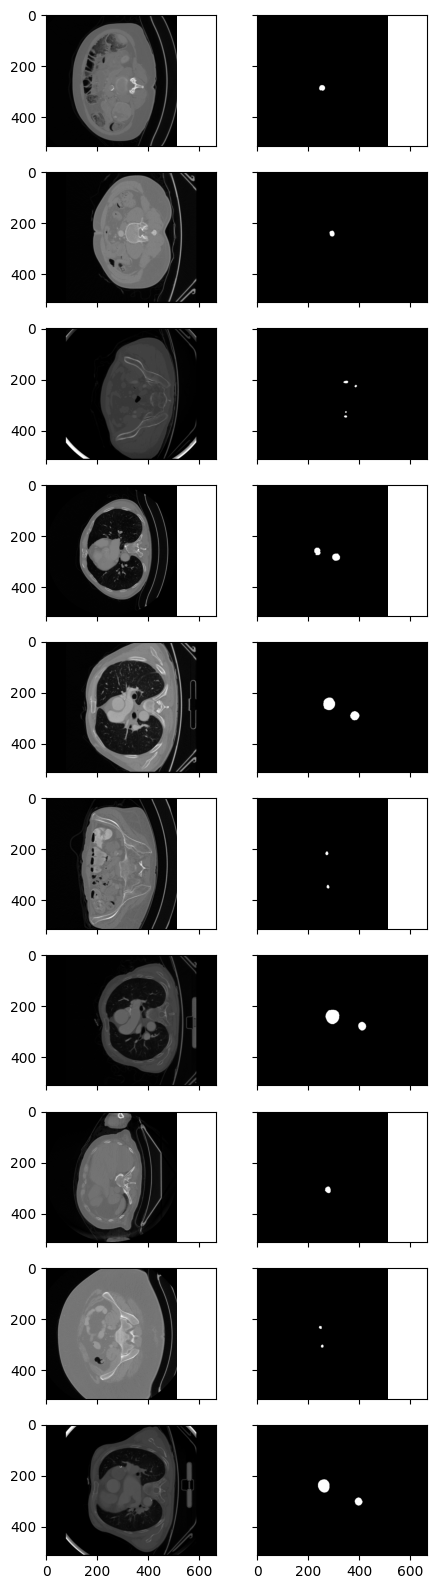

In [ ]:
#@title Affichage de quelques slices et leurs masques
import matplotlib.pyplot as plt
from random import choice

N = 10
fig, axes = plt.subplots(N, 2,figsize=(5,20),sharex=True, sharey=True)
axes = axes.flat

all_files = os.listdir(TRAINING_IMAGES_FOLDER)
chosen_files = [choice(all_files) for _ in range(10)]
for i,f in enumerate(chosen_files):
  image = np.load(TRAINING_IMAGES_FOLDER / f )
  mask = np.load(TRAINING_MASKS_FOLDER / f )

  axes[2*i].imshow(image, cmap="gray")
  axes[2*i+1].imshow(mask, cmap="gray")

# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.1)

# U-NET

In [ ]:
#@title Implémentation de U-Net

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D
from tensorflow.keras.models import Model

def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Contracting path (Encoder)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Expanding path (Decoder)
    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    # Output layer
    output = Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    return Model(inputs=inputs, outputs=output)

In [ ]:
#@title Instanciation

input_shape = (512, 512, 1)  # Replace this with the actual shape of your images
model = unet_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#@title Générateurs
!pip install opencv-python
import cv2
import glob

class CTScanDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, img_dir, mask_dir, batch_size=32, dim=(256, 256), shuffle=True):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.dim = dim
        self.shuffle = shuffle
        self.img_paths = sorted(glob.glob(os.path.join(img_dir, '*.npy')))
        self.mask_paths = sorted(glob.glob(os.path.join(mask_dir, '*.npy')))
        self.on_epoch_end()

    def __len__(self):
        return len(self.img_paths) // self.batch_size

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_img_paths = [self.img_paths[k] for k in indexes]
        batch_mask_paths = [self.mask_paths[k] for k in indexes]
        return self.__data_generation(batch_img_paths, batch_mask_paths)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.img_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_img_paths, batch_mask_paths):
        X = np.empty((self.batch_size, *self.dim, 1))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, (img_path, mask_path) in enumerate(zip(batch_img_paths, batch_mask_paths)):
            img = np.load(img_path)
            mask = np.load(mask_path)
            
             # Resize the images and masks to the desired size 
            img_resized = cv2.resize(img, self.dim, interpolation=cv2.INTER_LINEAR)
            mask_resized = cv2.resize(mask, self.dim, interpolation=cv2.INTER_NEAREST)

            # # Add a new axis to represent the channel dimension
            X[i,] = img_resized[..., np.newaxis]
            y[i,] = mask_resized[..., np.newaxis]
        return X, y

train_generator = CTScanDataGenerator(TRAINING_IMAGES_FOLDER, TRAINING_MASKS_FOLDER, batch_size=16, dim=(512,512))
test_generator = CTScanDataGenerator(TESTING_IMAGES_FOLDER, TESTING_MASKS_FOLDER, batch_size=16, dim=(512,512))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TODO : Afficher des graphiques https://discord.com/channels/@me/1050788953038540871/1099733245605716118


In [ ]:
# @title Entrainement :
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10


ResourceExhaustedError: ignored

## Enregistrement du modèle


In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

MODEL_NAME = '3198-training_902-testing_10epochs_0.999124-accuracy_04-23-00h30'

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(PP2_drive_sam_folder / 'models' / f'{MODEL_NAME}.h5')
print("Model saved")

## Résultats 
### Utilisations en ressources
On n'a pas utilisé la formule **Pro** de **Google Colab**, mais la formule **Pay As You Go**. 

Achat de 100 unités de calcul.

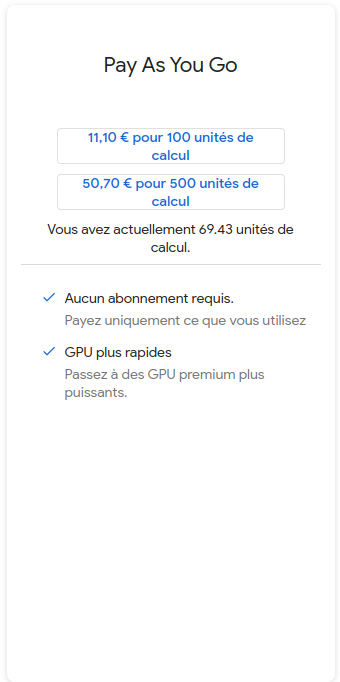

Ressources disponibles / utilisées pendant l'entrainement :

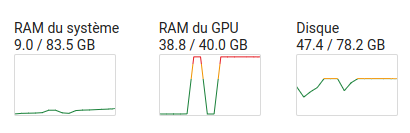

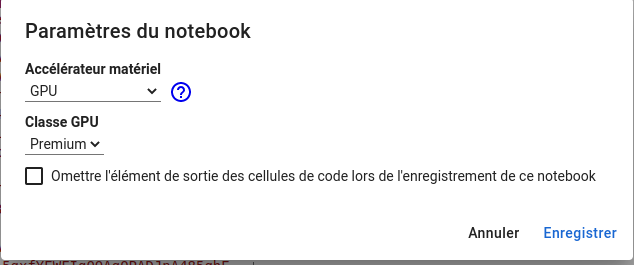

Au total, 30 unités de calcul utilisées (sur 100). (En comptant d'autres entrainements précédents...) 


### Des chiffres
- Batch size de 16 car mémoire GPU insuffisante avec 32
- **10 epochs**
- **12 minutes** d'entraînement
- Accuracy de **0.9992**


## Graphiques

In [ ]:
#@title Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig(PP2_drive_sam_folder / "models" / "model-loss.png")
plt.show()

In [ ]:
#@title Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(PP2_drive_sam_folder / "models" / "model-accuracy.png")
plt.show()